## Hidden Genres Using Clustering From Book Descriptions
Scraping books on OpenLibrary and clustering based on book summaries instead of the given genres/tags
##### https://openlibrary.org/dev/docs/api/books
##### Example - https://openlibrary.org/works/OL25312237W.json

In [20]:
# imports
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import time
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm


## Data Gathering and Exploring

In [23]:
# Generate 10000 unique random integers from 40000 to 90000
random_ids = random.sample(range(40000, 90001), 10000)
work_ids = [f"OL{id}W" for id in random_ids]

In [25]:
def extract_book_features(work_id):
    url = f'https://openlibrary.org/works/{work_id}.json' # this is how openlibrary sorts their API
    try:
        r = requests.get(url, timeout=10)
       
        data = r.json()
        return {
            "work_id": data.get("key", "").split("/")[-1],
            "title": data.get("title"),
            "description": data.get("description", {}).get("value")
                if isinstance(data.get("description"), dict)
                else data.get("description"),
            "subjects": data.get("subjects"),
            "subject_places": data.get("subject_places"),
            "subject_people": data.get("subject_people"),
            "subject_times": data.get("subject_times"),
            "first_publish_date": data.get("first_publish_date"),
            "author_keys": [a["author"]["key"].split("/")[-1] for a in data.get("authors", [])],
            "latest_revision": data.get("latest_revision"),
            "created_date": data.get("created", {}).get("value"),
            "last_modified_date": data.get("last_modified", {}).get("value"),
        }
    except:
        return None

In [27]:
Fetch valid books
rows = []
for wid in tqdm(work_ids):
    row = extract_book_features(wid)
    if row:
        rows.append(row)
    time.sleep(0.1)  # Respect rate limits

# Step 4: Create DataFrame
df = pd.DataFrame(rows)
print(f"Collected {len(df)} valid book entries.")
df.head()

100%|██████████| 10000/10000 [1:07:23<00:00,  2.47it/s]

Collected 10000 valid book entries.


,work_id,title,description,subjects,subject_places,subject_people,subject_times,first_publish_date,author_keys,latest_revision,created_date,last_modified_date
0,OL48846W,Funeral in blue,"In her haunting new Victorian novel, Anne Perr...","[Fiction, Private investigators, Private inves...","[England, London, London (England)]",None,None,None,[OL25148A],9,2009-12-08T02:07:55.772657,2021-10-08T06:54:57.623261
1,OL61529W,Idea della prosa,None,None,None,None,None,None,[OL23520A],2,2009-10-16T00:30:50.205091,2010-04-28T09:15:33.403636
2,OL84529W,Star Wars,"Sleek, swift, and deadly, the famed X-wing fig...","[Science fiction, Fighter pilots, Fiction, Fic...",None,None,None,None,[OL40284A],7,2009-10-17T07:57:18.823732,2023-10-10T19:00:07.300065
3,OL42905W,Principles of the institutional law of interna...,This is one of the first books to appear in th...,[International agencies],None,None,None,None,[OL9705A],4,2009-10-15T08:42:13.229356,2024-07-13T05:38:49.527438
4,OL42712W,"Arthur, High King of Britain",A twelve-year-old boy comes across Arthur Pend...,"[Children's stories, English, Juvenile fiction...",[Great Britain],[Arthur King],[To 1066],None,"[OL3477047A, OL462466A, OL9956116A, OL3249710A...",11,2009-10-15T08:28:04.677953,2023-08-22T08:30:32.668861


In [28]:
df

,work_id,title,description,subjects,subject_places,subject_people,subject_times,first_publish_date,author_keys,latest_revision,created_date,last_modified_date
0,OL48846W,Funeral in blue,"In her haunting new Victorian novel, Anne Perr...","[Fiction, Private investigators, Private inves...","[England, London, London (England)]",None,None,None,[OL25148A],9,2009-12-08T02:07:55.772657,2021-10-08T06:54:57.623261
1,OL61529W,Idea della prosa,None,None,None,None,None,None,[OL23520A],2,2009-10-16T00:30:50.205091,2010-04-28T09:15:33.403636
2,OL84529W,Star Wars,"Sleek, swift, and deadly, the famed X-wing fig...","[Science fiction, Fighter pilots, Fiction, Fic...",None,None,None,None,[OL40284A],7,2009-10-17T07:57:18.823732,2023-10-10T19:00:07.300065
3,OL42905W,Principles of the institutional law of interna...,This is one of the first books to appear in th...,[International agencies],None,None,None,None,[OL9705A],4,2009-10-15T08:42:13.229356,2024-07-13T05:38:49.527438
4,OL42712W,"Arthur, High King of Britain",A twelve-year-old boy comes across Arthur Pend...,"[Children's stories, English, Juvenile fiction...",[Great Britain],[Arthur King],[To 1066],None,"[OL3477047A, OL462466A, OL9956116A, OL3249710A...",11,2009-10-15T08:28:04.677953,2023-08-22T08:30:32.668861
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,OL72816W,Writing in between,None,"[England, Literature and society, 20th century...",[England],[Joseph Conrad (1857-1924)],[20th century],None,[OL19805A],9,2009-10-16T07:11:38.263313,2024-07-17T04:30:39.854338
9996,OL63563W,Whither India?,None,[India],[India],None,None,None,[OL14639A],3,2009-10-16T00:37:32.727549,2010-12-03T22:21:00.635832
9997,OL47961W,English music,"From the prize-winning author of First Light, ...","[Fiction, Fathers and sons, Psychic ability, Y...",[London (England)],None,None,None,[OL21220A],7,2009-10-15T11:55:34.777519,2024-08-24T18:40:56.888924
9998,OL51227W,Bulb gardening with Derek Fell,None,"[Bulbs, Bulbs (Plants)]",None,None,None,None,[OL19503A],4,2009-10-15T15:17:11.597389,2019-01-09T07:32:33.592529


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_id             10000 non-null  object
 1   title               9250 non-null   object
 2   description         2477 non-null   object
 3   subjects            7581 non-null   object
 4   subject_places      3038 non-null   object
 5   subject_people      1426 non-null   object
 6   subject_times       1102 non-null   object
 7   first_publish_date  138 non-null    object
 8   author_keys         10000 non-null  object
 9   latest_revision     10000 non-null  int64 
 10  created_date        10000 non-null  object
 11  last_modified_date  10000 non-null  object
dtypes: int64(1), object(11)
memory usage: 937.6+ KB


## Data Cleaning

In [30]:
# Right off the bat we should remove all rows with no descriptions which only leaves us with 2477 books but I think that is still 
# enough to make this work
df = df[df['description'].notna() & (df['description'].str.strip() != '')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_id             2477 non-null   object
 1   title               2477 non-null   object
 2   description         2477 non-null   object
 3   subjects            2432 non-null   object
 4   subject_places      1016 non-null   object
 5   subject_people      488 non-null    object
 6   subject_times       441 non-null    object
 7   first_publish_date  98 non-null     object
 8   author_keys         2477 non-null   object
 9   latest_revision     2477 non-null   int64 
 10  created_date        2477 non-null   object
 11  last_modified_date  2477 non-null   object
dtypes: int64(1), object(11)
memory usage: 251.6+ KB


In [31]:
# drop useless columns

df.drop(columns=['work_id', 'created_date', 'last_modified_date'], inplace=True)
df

C:\Users\Jon\AppData\Local\Temp\ipykernel_32960\180228095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['work_id', 'created_date', 'last_modified_date'], inplace=True)


,title,description,subjects,subject_places,subject_people,subject_times,first_publish_date,author_keys,latest_revision
0,Funeral in blue,"In her haunting new Victorian novel, Anne Perr...","[Fiction, Private investigators, Private inves...","[England, London, London (England)]",None,None,None,[OL25148A],9
2,Star Wars,"Sleek, swift, and deadly, the famed X-wing fig...","[Science fiction, Fighter pilots, Fiction, Fic...",None,None,None,None,[OL40284A],7
3,Principles of the institutional law of interna...,This is one of the first books to appear in th...,[International agencies],None,None,None,None,[OL9705A],4
4,"Arthur, High King of Britain",A twelve-year-old boy comes across Arthur Pend...,"[Children's stories, English, Juvenile fiction...",[Great Britain],[Arthur King],[To 1066],None,"[OL3477047A, OL462466A, OL9956116A, OL3249710A...",11
6,Dreams,Before the dawn of history mankind was engaged...,"[Dreams, New Age, Nonfiction, Psychology, Numi...",None,None,None,None,[OL18539A],6
...,...,...,...,...,...,...,...,...,...
9985,Germs,Discusses the nature and function of germs and...,"[Microbiology, Juvenile literature, Microorgan...",None,None,None,None,[OL19822A],6
9991,Potentially Yours,A New York City family rolling in dough meets ...,"[African Americans, Fiction, Fiction, general]",None,None,None,None,[OL28201A],5
9993,1920s,In 1927 the Dixons move from rural Georgia to ...,"[Juvenile fiction, African Americans, Fiction,...",[Chicago (Ill.)],None,None,None,[OL28346A],8
9997,English music,"From the prize-winning author of First Light, ...","[Fiction, Fathers and sons, Psychic ability, Y...",[London (England)],None,None,None,[OL21220A],7


In [32]:
df['description'] = df['description'].astype(str)


C:\Users\Jon\AppData\Local\Temp\ipykernel_32960\2676648986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].astype(str)


In [33]:
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # replace newlines with space
    text = re.sub(r'[^\w\s]', '', text.lower())  # lowercase and remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # collapse multiple spaces and trim
    return text

df['clean_description'] = df['description'].astype(str).apply(clean_text)

C:\Users\Jon\AppData\Local\Temp\ipykernel_32960\1864425935.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_description'] = df['description'].astype(str).apply(clean_text)


In [34]:
df

,title,description,subjects,subject_places,subject_people,subject_times,first_publish_date,author_keys,latest_revision,clean_description
0,Funeral in blue,"In her haunting new Victorian novel, Anne Perr...","[Fiction, Private investigators, Private inves...","[England, London, London (England)]",None,None,None,[OL25148A],9,in her haunting new victorian novel anne perry...
2,Star Wars,"Sleek, swift, and deadly, the famed X-wing fig...","[Science fiction, Fighter pilots, Fiction, Fic...",None,None,None,None,[OL40284A],7,sleek swift and deadly the famed xwing fighter...
3,Principles of the institutional law of interna...,This is one of the first books to appear in th...,[International agencies],None,None,None,None,[OL9705A],4,this is one of the first books to appear in th...
4,"Arthur, High King of Britain",A twelve-year-old boy comes across Arthur Pend...,"[Children's stories, English, Juvenile fiction...",[Great Britain],[Arthur King],[To 1066],None,"[OL3477047A, OL462466A, OL9956116A, OL3249710A...",11,a twelveyearold boy comes across arthur pendra...
6,Dreams,Before the dawn of history mankind was engaged...,"[Dreams, New Age, Nonfiction, Psychology, Numi...",None,None,None,None,[OL18539A],6,before the dawn of history mankind was engaged...
...,...,...,...,...,...,...,...,...,...,...
9985,Germs,Discusses the nature and function of germs and...,"[Microbiology, Juvenile literature, Microorgan...",None,None,None,None,[OL19822A],6,discusses the nature and function of germs and...
9991,Potentially Yours,A New York City family rolling in dough meets ...,"[African Americans, Fiction, Fiction, general]",None,None,None,None,[OL28201A],5,a new york city family rolling in dough meets ...
9993,1920s,In 1927 the Dixons move from rural Georgia to ...,"[Juvenile fiction, African Americans, Fiction,...",[Chicago (Ill.)],None,None,None,[OL28346A],8,in 1927 the dixons move from rural georgia to ...
9997,English music,"From the prize-winning author of First Light, ...","[Fiction, Fathers and sons, Psychic ability, Y...",[London (England)],None,None,None,[OL21220A],7,from the prizewinning author of first light ch...


In [52]:
#df.to_csv('OpenLibrary.csv', index=False) 
# save this incase I restart the notebook

## TFIDF Interpolation

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the clean descriptions
X_tfidf = vectorizer.fit_transform(df['clean_description'])

# Convert to a DataFrame 
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

In [144]:
tfidf_df

,10,100,11,12,14,15,150,16,17,1700s,...,yorks,yosemite,youll,young,younger,youre,youth,youve,zoo,zukofskys
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.078338,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
from sklearn.decomposition import TruncatedSVD

# Initialize SVD
svd = TruncatedSVD(n_components=100, random_state=42)

# Apply dimensionality reduction
X_reduced = svd.fit_transform(X_tfidf)

## K-Means Clustering

In [148]:
from sklearn.cluster import KMeans

# Choose number of clusters 
n_clusters = 30 # I chose 30 but according to the optimal K-means, it's more like 100-150. 
                # I don't believe that is practical for this project and taking lower cluster number will work better for visuliazation and analysis 

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

# Add cluster labels to your original DataFrame
df['cluster'] = clusters

C:\Users\Jon\AppData\Local\Temp\ipykernel_32960\3916545537.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


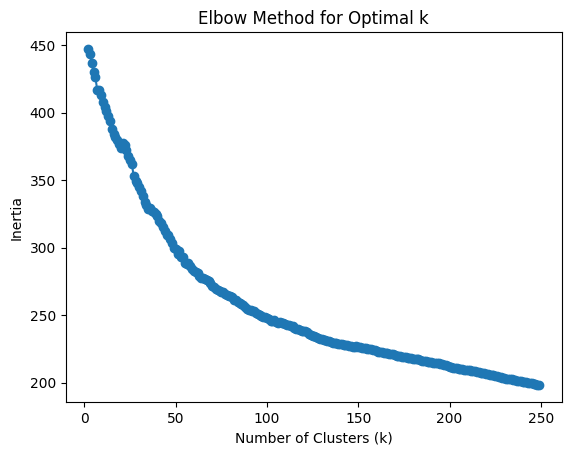

In [150]:
import matplotlib.pyplot as plt
inertias = []

for k in range(2, 250):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_reduced)
    inertias.append(km.inertia_)

plt.plot(range(2, 250), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [151]:
df.groupby('cluster')['description'].apply(lambda x: x.sample(3, random_state=1).tolist())


cluster
0     [Discusses how to develop and maintain healthy...
1     [While visiting the Everglades National Park w...
2     [Baby Lamb goes to many different animals look...
3     [A boy accompanies some guys from space on a v...
4     [1. The Awakening Evil\r\n2. The First Evil\r\...
5     [An introduction to the Sunshine State, its hi...
6     [C’etait une calme matinee d’ete. Le soleil mo...
7     [The Bailey School kids believe that the new p...
8     [Headstrong lady-in-waiting Marjory de Warenne...
9     [James Blish was a science fiction writer who ...
10    [The Pretty Sister of Jose (1889) is a romance...
11    ["Since 1968 Lewis Turco's Book of Forms has b...
12    [A collection of prose essays., Passionate, ex...
13    [Hunters after a bear are constantly outwitted...
14    [Presents a biography of the religious leader,...
15    [Stripe, a little tiger cub, strolls into the ...
16    [The bestselling author of Before Women Had Wi...
17    [Describes the second great battle

In [152]:
#!pip install umap-learn

## Plotting and Visualization

In [153]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_2d = umap_2d.fit_transform(X_reduced)

# Add UMAP coordinates to the DataFrame
df['umap_x'] = X_2d[:, 0]
df['umap_y'] = X_2d[:, 1]

C:\Users\Jon\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Jon\anaconda3\envs\myenv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Jon\AppData\Local\Temp\ipykernel_32960\353119575.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['umap_x'] = X_2d[:, 0]
C:\Users\Jon\AppData\Local\Temp\ipykernel_32960\353119575.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

<Figure size 1200x800 with 0 Axes>

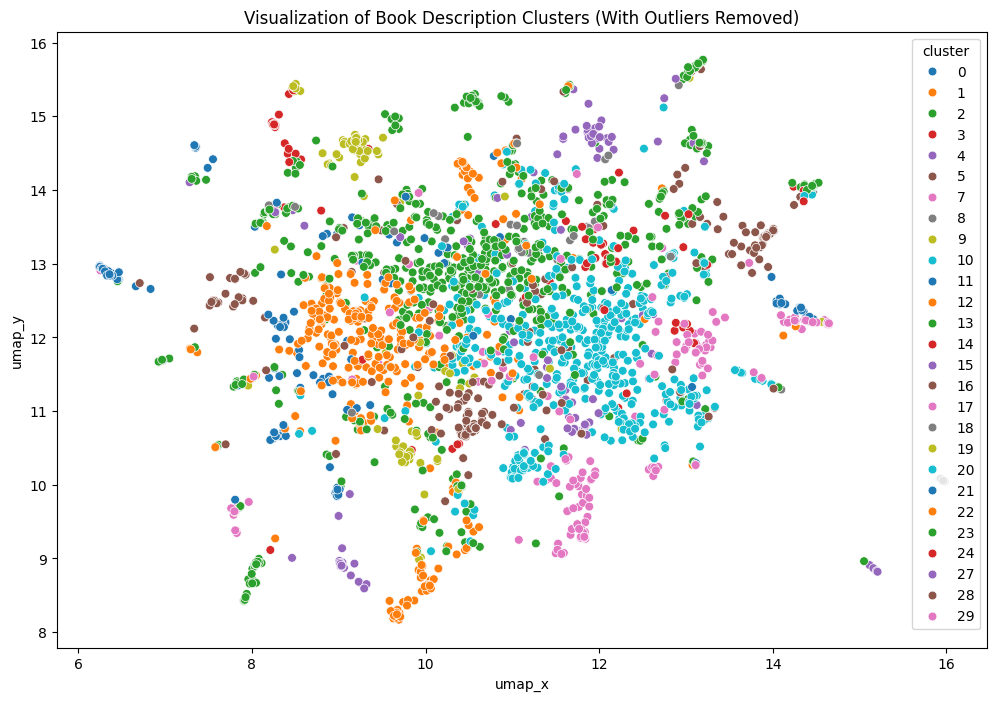

In [168]:
# original without outliers was difficult to view
plt.figure(figsize=(12, 8))

# Define z-score threshold for outliers
z_thresh = 3

# Calculate z-scores for UMAP 
z_scores_x = np.abs((df['umap_x'] - df['umap_x'].mean()) / df['umap_x'].std())
z_scores_y = np.abs((df['umap_y'] - df['umap_y'].mean()) / df['umap_y'].std())

# Filter out outliers
df_filtered = df[(z_scores_x < z_thresh) & (z_scores_y < z_thresh)]

# Plot filtered data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='umap_x',
    y='umap_y',
    hue='cluster',
    palette='tab10',
    data=df_filtered,
    legend='full',
    s=40
)
plt.title('Visualization of Book Description Clusters (With Outliers Removed)')
plt.show()

In [155]:
# Show 3 sample descriptions per cluster
for i in sorted(df['cluster'].unique()):
    print(f"\nCluster {i}:\n" + "-"*20)
    print("\n".join(df[df['cluster'] == i]['description'].sample(3, random_state=1).tolist()))


Cluster 0:
--------------------
Discusses how to develop and maintain healthy self-esteem and a positive attitude.
History and criticism of Urdu literature of South Asia, 1857-1982.
Profiles each of the fifty-six men who signed the Declaration of Independence, giving historical information about the colonies they represented. Includes the text of the Declaration and its history.

Cluster 1:
--------------------
While visiting the Everglades National Park with their parents, the Landon children uncover the mystery of dying manatees and learn important lessons about the natural environment.
Three children wake up early in the morning to prepare a surprise for their mother.
Two children befriend the old man known as the Birdman of Bryher and help him lift a curse from their island.

Cluster 2:
--------------------
Baby Lamb goes to many different animals looking for someone to be his mother after she died
Briefly describes how zoos collect, care for, exhibit, study, and teach about diffe

In [156]:
# Add cluster labels to the TF-IDF DataFrame
tfidf_df['cluster'] = df['cluster'].values

# View top 10 terms by average TF-IDF weight in each cluster
for cluster_num in sorted(tfidf_df['cluster'].unique()):
    cluster_tfidf = tfidf_df[tfidf_df['cluster'] == cluster_num].drop(columns='cluster')
    mean_weights = cluster_tfidf.mean(axis=0)
    top_terms = mean_weights.sort_values(ascending=False).head(10)
    print(f"\nCluster {cluster_num} top terms:")
    print(", ".join(top_terms.index.tolist()))


Cluster 0 top terms:
history, discusses, century, uses, used, america, behavior, examines, traces, natural

Cluster 1 top terms:
children, house, parents, old, people, man, mother, stories, lives, tales

Cluster 2 top terms:
animals, describes, different, approaches, larger, tiny, plants, looking, goes, baby

Cluster 3 top terms:
boy, young, comes, father, try, help, gets, christmas, baseball, little

Cluster 4 top terms:
king, magic, evil, verse, adventures, kingdom, prince, uncle, world, enchanter

Cluster 5 top terms:
geography, history, state, people, economy, culture, government, introduction, south, sites

Cluster 6 top terms:
la, et, en, le, des, que, du, une, est, el

Cluster 7 top terms:
father, school, high, mother, family, story, son, finds, way, life

Cluster 8 top terms:
day, year, mr, special, junie, history, friend, mother, mrs, jim

Cluster 9 top terms:
science, fiction, time, story, asimov, earth, writer, robot, foundation, wells

Cluster 10 top terms:
novel, story, p

In [172]:
#Manually nameing the clustes based of top terms and sample descriptions
cluster_names = {
    0: "Historical Perspectives and Commentary",
    1: "Generational Tales",
    2: "Natural World",
    3: "Boyhood",
    4: "Magic, Royalty, and Adventure",
    5: "Geography and Culture",
    6: "French and Spanish Language",
    7: "Coming-of-Age",
    8: "Classroom Tales ",
    9: "Classic Science Fiction",
    10: "Modern Novels",
    11: "Religious Works",
    12: "Anthologies ",
    13: "Festive Tales",
    14: "Religion and Politics",
    15: "Mysterious Children's Tales",
    16: "Friendship",
    17: "War History",
    18: "Magical Adventure Series",
    19: "Natural and Man-made",
    20: "Life Journeys",
    21: "School Adventures",
    22: "Academic Editions",
    23: "Biographies of Leaders",
    24: "Illustrated and Rhyming Books",
    25: "Romantic and Royal Dram",
    26: "Technical Manuals",
    27: "Illustrated Poetry Collections",
    28: "Life Cycles",
    29: "Indian Leaders",}
df['cluster_name'] = df['cluster'].map(cluster_names)

C:\Users\Jon\AppData\Local\Temp\ipykernel_32960\865679056.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_name'] = df['cluster'].map(cluster_names)


In [174]:
df[['cluster', 'cluster_name']].head(10)

,cluster,cluster_name
0,28,Life Cycles
2,20,Life Journeys
3,22,Academic Editions
4,3,Boyhood
6,22,Academic Editions
7,20,Life Journeys
11,4,"Magic, Royalty, and Adventure"
21,19,Natural and Man-made
29,22,Academic Editions
34,1,Generational Tales


<Figure size 1200x800 with 0 Axes>

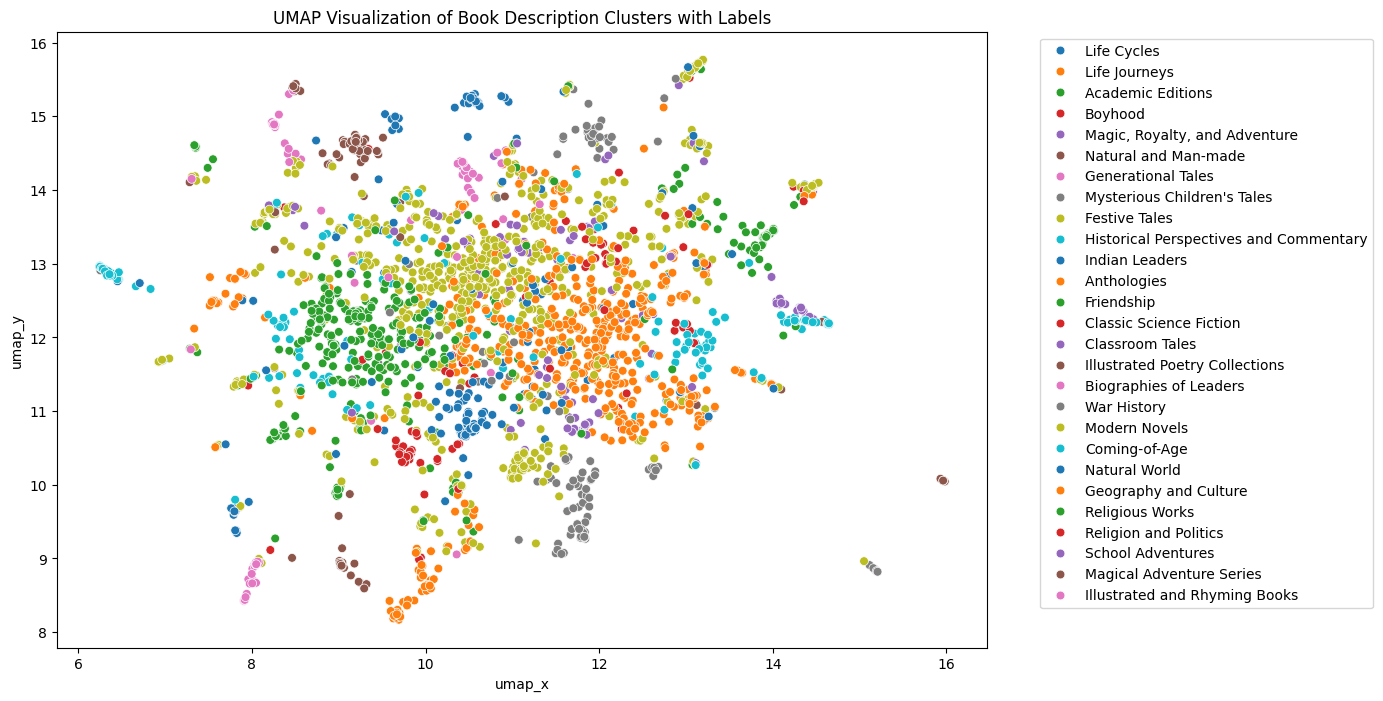

In [198]:
plt.figure(figsize=(12, 8))

# Define z-score threshold for outliers
z_thresh = 3

# Calculate z-scores for UMAP 
z_scores_x = np.abs((df['umap_x'] - df['umap_x'].mean()) / df['umap_x'].std())
z_scores_y = np.abs((df['umap_y'] - df['umap_y'].mean()) / df['umap_y'].std())

# Filter out outliers
df_filtered = df[(z_scores_x < z_thresh) & (z_scores_y < z_thresh)]

# Plot filtered data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='umap_x',
    y='umap_y',
    hue='cluster_name',
    palette='tab10',
    data=df_filtered,
    legend='full',
    s=40

)
plt.title('UMAP Visualization of Book Description Clusters with Labels')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

I think this turned out very well considering the optimal number of clusters was not used. 30 clusters were effectively sorted and labeled baed on the top terms and sample descriptions within the clusters.